# Simple Linear Regression (Delivery time)

# Delivery_time -> Predict delivery time using sorting time

In [1]:
# importing the requred libraries

import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
import statsmodels.formula.api as smf

filterwarnings('ignore')#ignoreing the error

In [2]:
#reading the salary data using pandas
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#checking there data types and finding whether they have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#lets Describe the data's

df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
#finding whether datasets contains null values
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

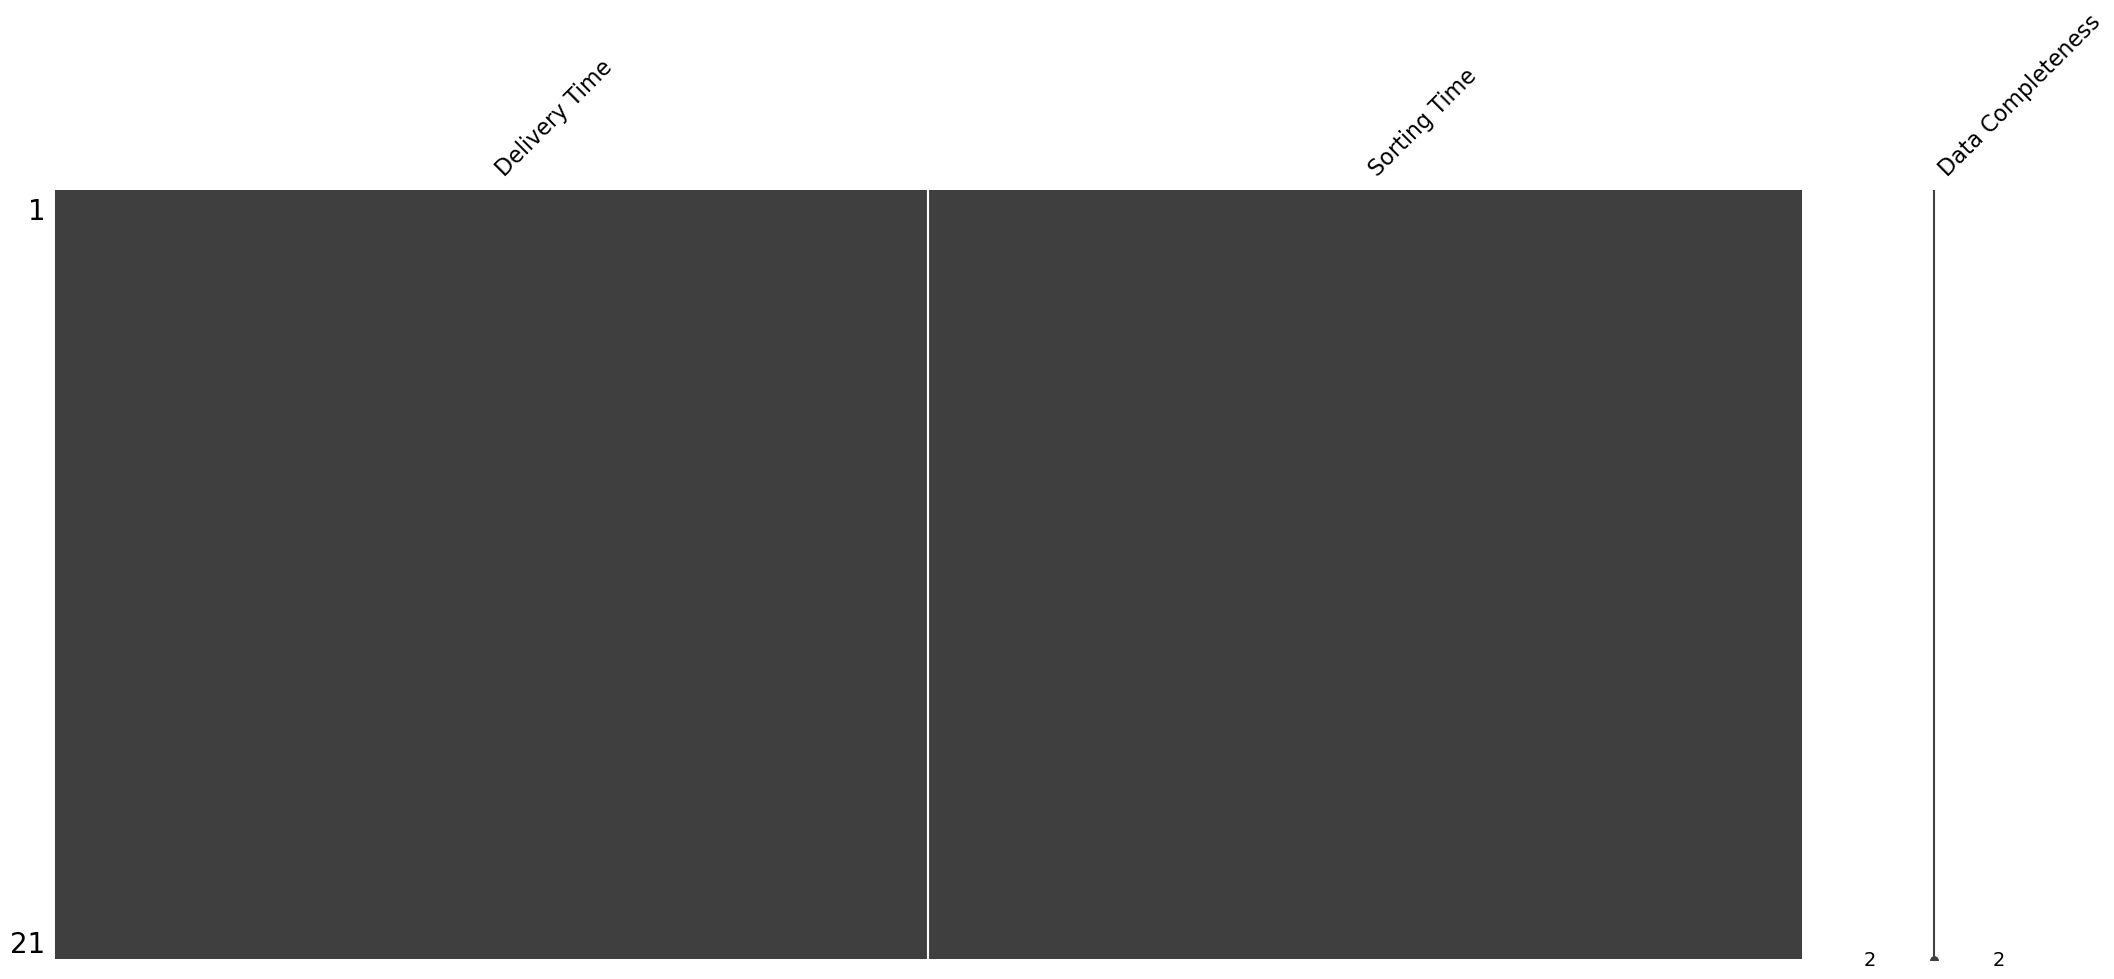

In [6]:
#checking whether null values are present in the datasets
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

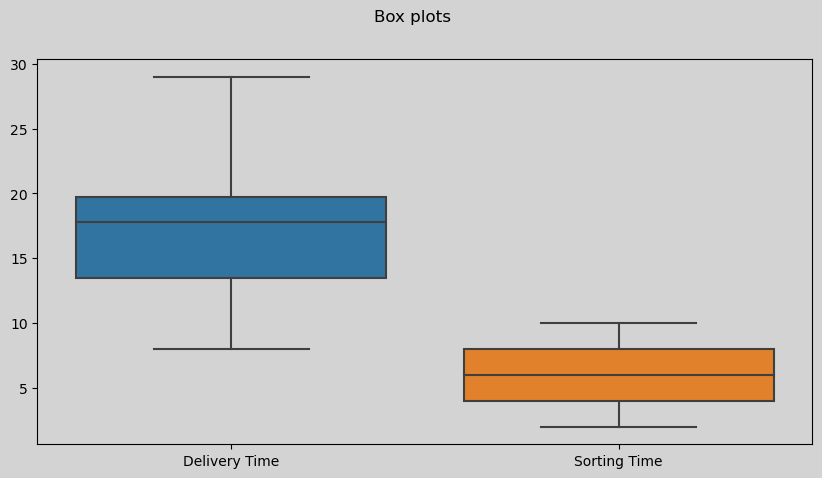

In [9]:
#finding outlier by using box plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Box plots')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.boxplot(data=df);

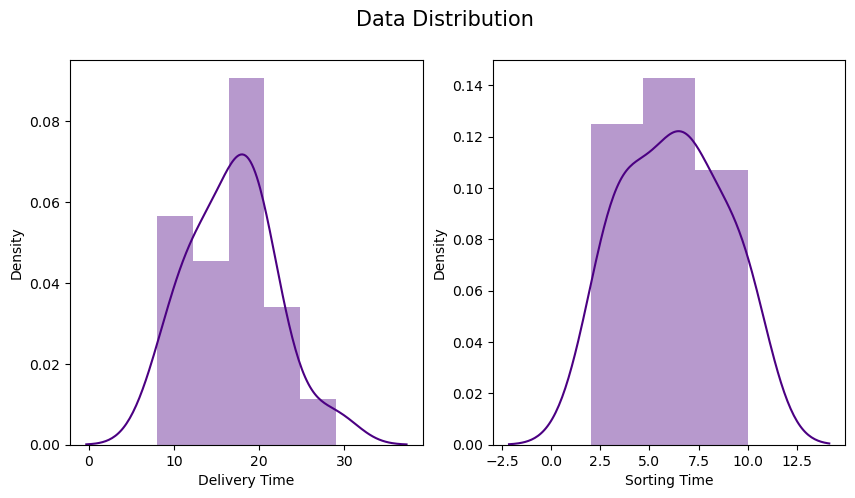

In [10]:
#let me see the distribution by ploting
plt.figure(figsize=(10,5))

axes=plt.axes()
axes.set_facecolor('lightgrey')
plt.suptitle('Data Distribution',fontsize=15)
plt.subplot(1,2,1)
sns.distplot(df['Delivery Time'],color='indigo');
plt.subplot(1,2,2)
sns.distplot(df['Sorting Time'],color='indigo');

In [11]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
df['Sorting Time'].value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: Sorting Time, dtype: int64

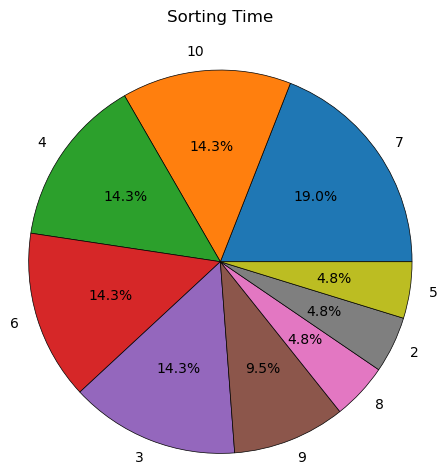

In [17]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
season=df['Sorting Time'].value_counts()
label=[7,10,4,6,3,9,8,2,5]
plt.suptitle('Sorting Time')
plt.pie(season,autopct = lambda pct: func(pct, df['Sorting Time']),labels=label,wedgeprops = wp,radius=1.2);
plt.tight_layout()

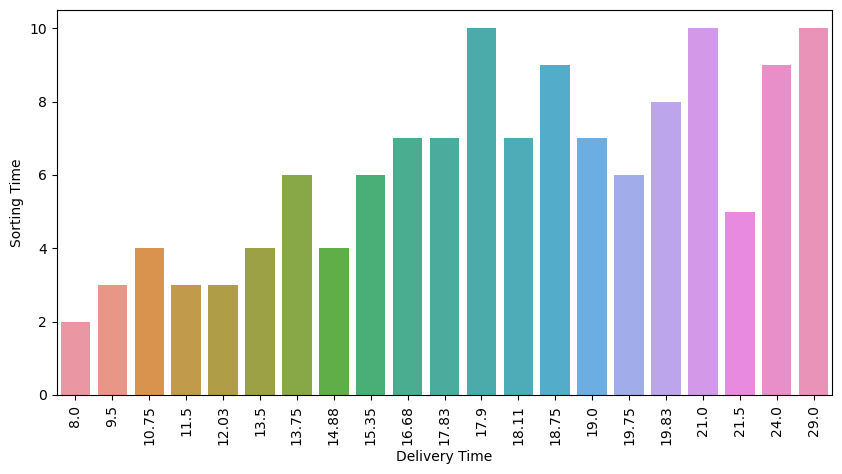

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Delivery Time'],y=df['Sorting Time'])
plt.xticks(rotation=90);

In [18]:
#spliting the variable 
x=df.iloc[:,1]

y=df.iloc[:,0]


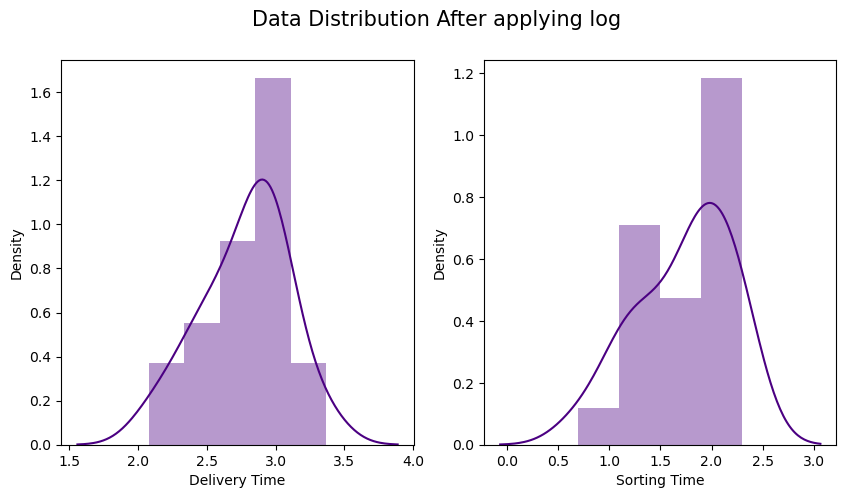

In [32]:
#let me see the distribution by ploting
plt.figure(figsize=(10,5))

axes=plt.axes()
axes.set_facecolor('lightgrey')
plt.suptitle('Data Distribution After applying log',fontsize=15)
plt.subplot(1,2,1)
sns.distplot(np.log(df['Delivery Time']),color='indigo');
plt.subplot(1,2,2)
sns.distplot(np.log(df['Sorting Time']),color='indigo');

In [21]:
#creating the model
import statsmodels.formula.api as sfa
model=sfa.ols("y~np.log(x)",data=df).fit()

In [33]:
#accuracy of the model
print('accuracy of the model :',model.rsquared_adj)

accuracy of the model : 0.6794141696130761


In [34]:
#pvalues and tvalues
print('pvalues of the model',model.pvalues,'\n','\n','tvalues of the model',model.tvalues)

pvalues of the model Intercept    0.641980
np.log(x)    0.000003
dtype: float64 
 
 tvalues of the model Intercept    0.472460
np.log(x)    6.586789
dtype: float64


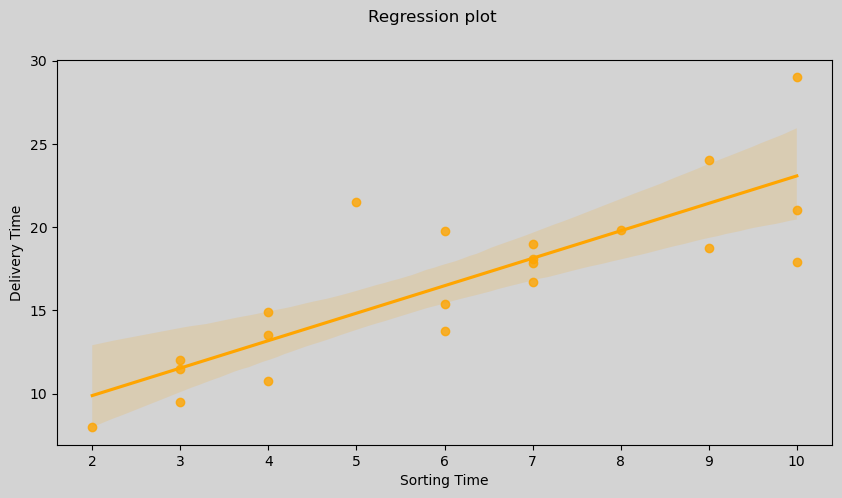

In [35]:
#ploting regression Plot 
plt.figure(figsize=(10,5),facecolor='lightgrey')
axes=plt.axes()
axes.set_facecolor('lightgrey')
plt.suptitle('Regression plot')
sns.regplot(x,y,color='orange');

In [36]:
#creating the model by applying log on both the sides
import statsmodels.formula.api as sfa
model=sfa.ols("np.log(y)~np.log(x)",data=df).fit()

In [37]:
#accuracy of the model
print('accuracy of the model :',model.rsquared_adj)

accuracy of the model : 0.7601698413355158


In [38]:
#pvalues and tvalues
print('pvalues of the model',model.pvalues,'\n','\n','tvalues of the model',model.tvalues)

pvalues of the model Intercept    5.921137e-11
np.log(x)    1.601539e-07
dtype: float64 
 
 tvalues of the model Intercept    13.085552
np.log(x)     8.024484
dtype: float64


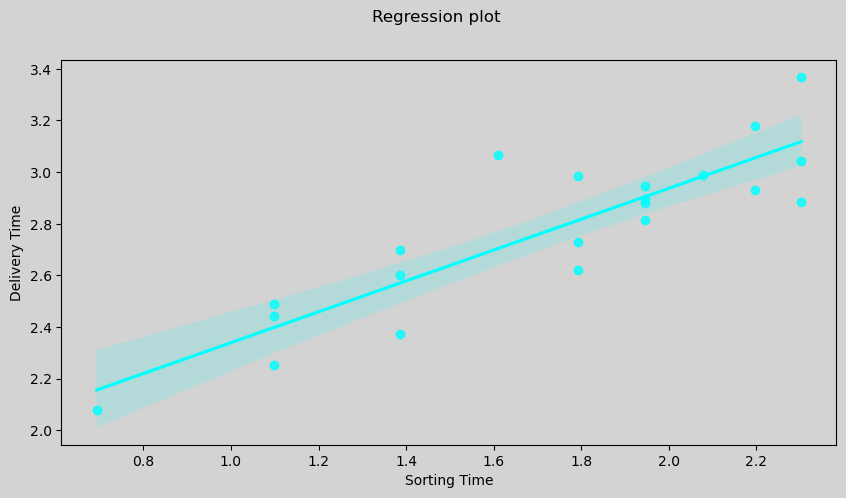

In [39]:
#ploting regression Plot 
plt.figure(figsize=(10,5),facecolor='lightgrey')
axes=plt.axes()
axes.set_facecolor('lightgrey')
plt.suptitle('Regression plot')
sns.regplot(np.log(x),np.log(y),color='cyan');